# **KNN Algorithm Lung Cancer Prediction**

**import data set**

In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/ML_dataset/lungcancer_ml")
df

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


In [3]:
df.isna().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

**Split input and output data**

In [4]:
x=df.iloc[:,2:-1].values
y=df.iloc[:,-1].values
x


array([[35,  3,  5,  4],
       [27, 20,  2,  5],
       [30,  0,  5,  2],
       [28,  0,  8,  1],
       [68,  4,  5,  6],
       [34,  0, 10,  0],
       [58, 15, 10,  0],
       [22, 12,  5,  2],
       [45,  2,  6,  0],
       [52, 18,  4,  5],
       [33,  4,  8,  0],
       [18, 10,  6,  3],
       [25,  2,  5,  1],
       [28, 20,  2,  8],
       [34, 25,  4,  8],
       [39, 18,  8,  1],
       [42, 22,  3,  5],
       [19, 12,  8,  0],
       [62,  5,  4,  3],
       [73, 10,  7,  6],
       [55, 15,  1,  3],
       [33,  8,  8,  1],
       [22, 20,  6,  2],
       [44,  5,  8,  1],
       [77,  3,  2,  6],
       [21, 20,  5,  3],
       [37, 15,  6,  2],
       [34, 12,  8,  0],
       [55, 20,  1,  4],
       [40, 20,  2,  7],
       [36, 13,  5,  2],
       [56, 20,  3,  3],
       [47, 15,  1,  8],
       [62, 25,  3,  4],
       [26, 10,  7,  2],
       [25, 20,  8,  2],
       [59, 20,  3,  4],
       [62, 15,  5,  5],
       [33, 25,  8,  2],
       [37, 10,  5,  3],


**training data and testing data**

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)
x_train


array([[21, 20,  5,  3],
       [19, 12,  8,  0],
       [33, 25,  8,  2],
       [30,  0,  5,  2],
       [43, 30,  3,  8],
       [50, 20,  2,  4],
       [22, 12,  5,  2],
       [59, 20,  3,  4],
       [44,  5,  8,  1],
       [51, 25,  9,  0],
       [34, 12,  8,  0],
       [34,  0, 10,  0],
       [62, 20,  5,  6],
       [55, 15,  1,  3],
       [62, 15,  5,  5],
       [44, 30,  1,  6],
       [62,  5,  4,  3],
       [18, 10,  6,  3],
       [55, 20,  1,  4],
       [28,  0,  8,  1],
       [27, 20,  2,  5],
       [42, 22,  3,  5],
       [36, 13,  5,  2],
       [26, 10,  7,  2],
       [22, 20,  6,  2],
       [28, 10,  4,  1],
       [45,  2,  6,  0],
       [77, 20,  5,  4],
       [35,  3,  5,  4],
       [39, 18,  8,  1],
       [37, 10,  5,  3],
       [62, 25,  3,  4],
       [35, 20,  5,  1],
       [40, 20,  2,  7],
       [77,  3,  2,  6],
       [47, 12,  8,  0],
       [73, 10,  7,  6],
       [25,  2,  5,  1],
       [26, 34,  1,  8],
       [39, 15,  7,  2],


In [6]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-1.30334009,  0.58034365, -0.13272342, -0.04238811],
       [-1.42581708, -0.41992345,  1.10863093, -1.39032985],
       [-0.56847812,  1.20551059,  1.10863093, -0.49170202],
       [-0.75219362, -1.92032411, -0.13272342, -0.49170202],
       [ 0.04390685,  1.83067753, -0.96029299,  2.20418148],
       [ 0.47257633,  0.58034365, -1.37407777,  0.40692581],
       [-1.24210159, -0.41992345, -0.13272342, -0.49170202],
       [ 1.0237228 ,  0.58034365, -0.96029299,  0.40692581],
       [ 0.10514534, -1.29515717,  1.10863093, -0.94101594],
       [ 0.53381482,  1.20551059,  1.52241571, -1.39032985],
       [-0.50723963, -0.41992345,  1.10863093, -1.39032985],
       [-0.50723963, -1.92032411,  1.9362005 , -1.39032985],
       [ 1.20743829,  0.58034365, -0.13272342,  1.30555364],
       [ 0.77876881, -0.04482329, -1.78786256, -0.04238811],
       [ 1.20743829, -0.04482329, -0.13272342,  0.85623973],
       [ 0.10514534,  1.83067753, -1.78786256,  1.30555364],
       [ 1.20743829, -1.

**Apply algoritham**


In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred


array([0, 1, 0, 1, 1, 1])

In [8]:
y_test

array([0, 1, 0, 1, 1, 1])

**confusion metrix**

array([[2, 0],
       [0, 4]])

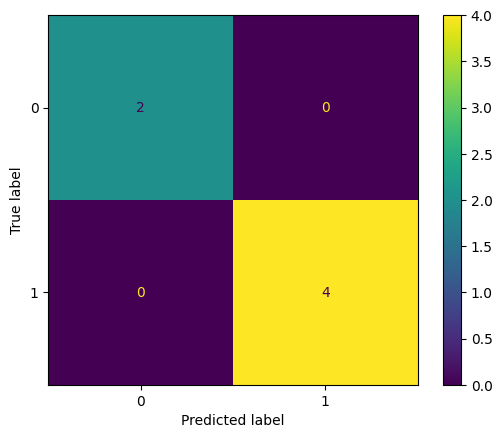

In [9]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
label=[0,1]
result=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(result,display_labels=label)
cmd.plot()
result


**Perfomance method Accuracy Score**

In [10]:
score=accuracy_score(y_test,y_pred)
score

1.0